# 인코딩 연습

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
titanic_df = pd.read_csv('train.csv', encoding = 'utf-8')

- 성별(Sex)은 단순히 바꾸기만 하면 되니까 LabelEncoder
- 항구(Embarked)는 여러개 데이터니까 OneHotEncoder

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
oe = OneHotEncoder()

### LabelEncoder 순서

1. LabelEncoder 불러오기
2. le 로 LabelEncoder 설계도 가져와서
3. le.fit(컬럼)  학습시킬 컬럼을 넣어 le를 학습시키기
4. le.transform(컬럼)   학습시킨 le를 통해 바꿀 데이터를 넣어 변환시키기

In [6]:
le.fit(titanic_df[['Sex']])
titanic_df['Sex_le'] = le.transform(titanic_df[['Sex']])

titanic_df.head(3)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


### OneHotEncdoer 순서

1. OneHotEncdoer 불러오기
2. oe 로 OneHotEncoder 설계도 가져오기
3. oe.fit(컬럼)  인코딩 적용할 컬럼 넣어서 학습시키고
4. oe.transform(컬럼)   컬럼 넣어서 변환시켜 2진법으로!

> 그리고나서 데이터가 너무 많아서 안나와 CSR 때문에

5. (4)번을 CSR 변수에 넣어 
6. 그리고 pd.DataFrame을 해서 데이터프레임으로 넣어주면서 
   변수에는 .toarray() 를 해서 표에 넣어주고,  
   컬럼명은 oe.get_names_out() 필수 

   CSR_df = pd.DataFrame(CSR.toarray(), columns = oe.get_feature_names_out())

7. 그리고 원래 df 랑 CSR_df 랑 axis =1 로 concat 하면 끝

In [23]:
oe.fit(titanic_df[['Embarked']])
csr = oe.transform(titanic_df[['Embarked']])


csr_df = pd.DataFrame(csr.toarray(), columns = oe.get_feature_names_out())
csr_df

titanic_df2 = pd.concat([titanic_df, csr_df], axis=1) 
titanic_df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le,Embarked_oe,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(0, 0)\t1.0",1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(0, 0)\t1.0",1.0,0.0,0.0,0.0


## Pandas 의 get_dummies 사용한 버전

개인적으로는 이게 훨씬 쉬운듯

In [21]:

embarked_df = pd.get_dummies(titanic_df[['Embarked']], dtype=float)
embarked_df

titanic_df3 = pd.concat([titanic_df, embarked_df], axis=1)
titanic_df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le,Embarked_oe,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(0, 0)\t1.0",1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(0, 2)\t1.0",0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(0, 2)\t1.0",0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,"(0, 2)\t1.0",0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,"(0, 2)\t1.0",0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(0, 0)\t1.0",1.0,0.0,0.0


# 스케일링 연습

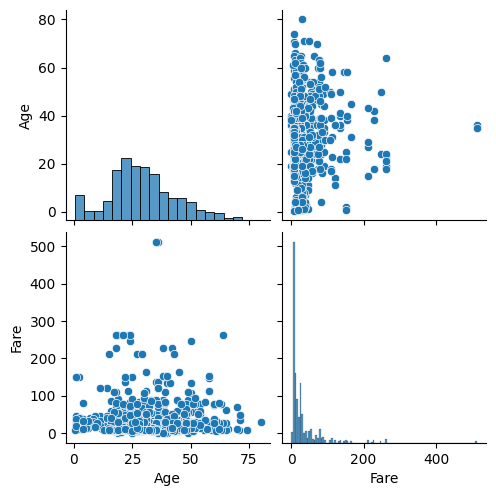

In [28]:
sns.pairplot(titanic_df[['Age', 'Fare']])

( 시각화를 해보니 Fare는 이상치가 있어서 StandardScaler )
( Age는 이상치가 없이 고르게 분포된 편이라 MinMaxScaler )

## 표준화 StandardScaler

 - 시각화를 통해 데이터가 한곳에 분포되어 있거나 이상치가 있을 때 사용
 >> (값이 떨어져있을 때 표준편차로 나누기때문에 편차가 작아짐)

 - 하지만 데이터의 최소 & 최대값이 정해져있지 않음

In [24]:
from sklearn.preprocessing import StandardScaler

In [36]:
sd_ss = StandardScaler()
sd_ss.fit(titanic_df3[['Fare']])

titanic_df3['Fare_sc'] = sd_ss.transform(titanic_df3[['Fare']])


## 정규화 MinMaxScaler

- 0 과 1 사이로 모든 데이터 스케일을 맞추는 것 

- 최대 & 최소 범위가 명확하게 됨

- 이상치가 없을 때 사용하기 적합

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mm_sc = MinMaxScaler()
mm_sc.fit(titanic_df3[['Age']])

titanic_df3['Age_sc'] = mm_sc.transform(titanic_df3[['Age']]) 


In [37]:
titanic_df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_le,Embarked_oe,Embarked_C,Embarked_Q,Embarked_S,Age_sc,Fare_sc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(0, 0)\t1.0",1.0,0.0,0.0,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.321438,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.434531,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0,0.434531,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,"(0, 2)\t1.0",0.0,0.0,1.0,0.334004,-0.386671
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,0.233476,-0.044381
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,"(0, 2)\t1.0",0.0,0.0,1.0,NaN,-0.176263
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(0, 0)\t1.0",1.0,0.0,0.0,0.321438,-0.044381


<Axes: ylabel='Count'>

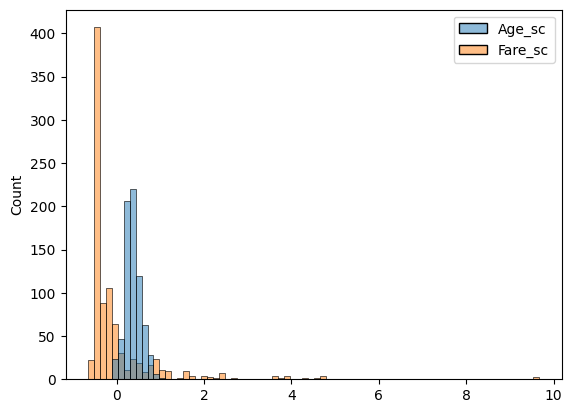

In [40]:
sns.histplot(titanic_df3[['Age_sc', 'Fare_sc']])